<a href="https://colab.research.google.com/github/HARASEON/Deep_Learning_tensorflow/blob/main/Day2_Deeplearning_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 1. dataset 준비하기(Train/Test)
# Load dataset
mnist = tf.keras.datasets.mnist

# 2. data preprocessing
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

# 3. sample data
# Visualization
x_test.shape,y_test.shape

(60000, 28, 28) (60000,)


((10000, 28, 28), (10000,))

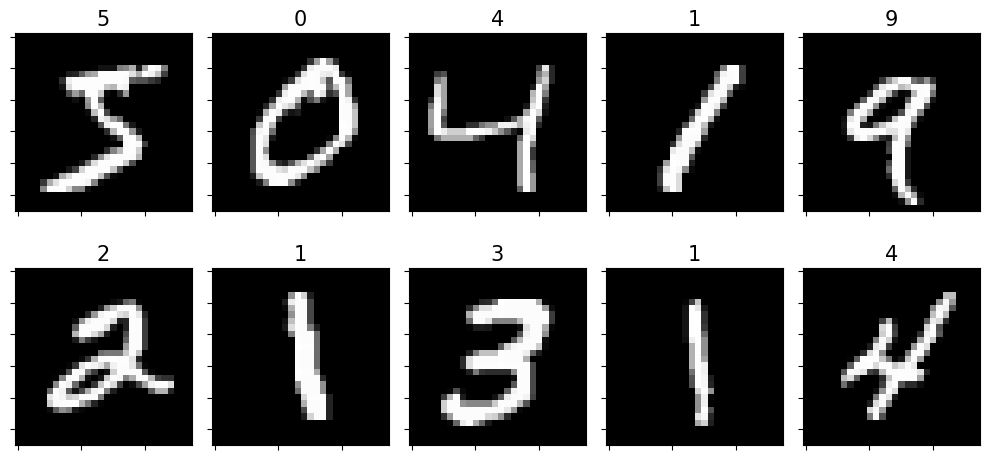

In [ ]:
fig, axes = plt.subplots(2, 5)
fig.set_size_inches(10, 5)

for i in range(10):
  axes[i//5, i%5].imshow(x_train[i], cmap ='gray')
  axes[i//5, i%5].set_title(str(y_train[i]), fontsize=15)
  plt.setp( axes[i//5, i%5].get_xticklabels(), visible=False)
  plt.setp( axes[i//5, i%5].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [ ]:
# data normalization to reduce the val_loss
x_train = x_train/255.0
y_train = x_test/255.0



*   소프트맥스: 입력받은 값을 출력으로 0~1사이의 값으로 모두 정규화하며 출력 값들의 총합은 항상 1이 되는 특성을 가진 함수
  * 가장 큰 출력 값을 부여받은 클래스가 확률이 가장 높은 것으로 이용됨


In [ ]:
# Design model
# Drop out 숫자 잘 맞춰줘야 에러 안남
model = Sequential([
                    Flatten(),
                    Dense(1024, activation='relu'),
                    Dropout(0.5),
                    Dense(256, activation = 'relu'),
                    Dropout(0.5),
                    Dense(256, activation = 'relu'),
                    BatchNormalization(),
                    Dense(64, activation= 'relu'),
                    BatchNormalization(),
                    Dense(10, activation = 'softmax')
                    ])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
# model monitering
# callbacks = [ModelCheckpoint]

checkpoint_path= "my_checkpoint_ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             save_weights_only = True,
                             save_best_only = True,
                             monitor='val_loss',
                             verbose = 1)

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10)

In [ ]:
# model training
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs= 100,
                    callbacks= [checkpoint, early_stopping])

Epoch 1/100
1874/1875 [============================>.] - ETA: 0s - loss: 0.4278 - acc: 0.8672
Epoch 1: val_loss improved from inf to 0.14090, saving model to my_checkpoint_ckpt
1875/1875 [==============================] - 51s 26ms/step - loss: 0.4276 - acc: 0.8672 - val_loss: 0.1409 - val_acc: 0.9578
Epoch 2/100
1875/1875 [==============================] - ETA: 0s - loss: 0.1996 - acc: 0.9408
Epoch 2: val_loss improved from 0.14090 to 0.11028, saving model to my_checkpoint_ckpt
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1996 - acc: 0.9408 - val_loss: 0.1103 - val_acc: 0.9669
Epoch 3/100
1873/1875 [============================>.] - ETA: 0s - loss: 0.1596 - acc: 0.9528
Epoch 3: val_loss improved from 0.11028 to 0.09721, saving model to my_checkpoint_ckpt
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1598 - acc: 0.9528 - val_loss: 0.0972 - val_acc: 0.9712
Epoch 4/100
1874/1875 [============================>.] - ETA: 0s - loss: 0.1334 - acc:

In [ ]:
# model monitorin
# input file name saved the checkpoint
model.load_weights(checkpoint_path)

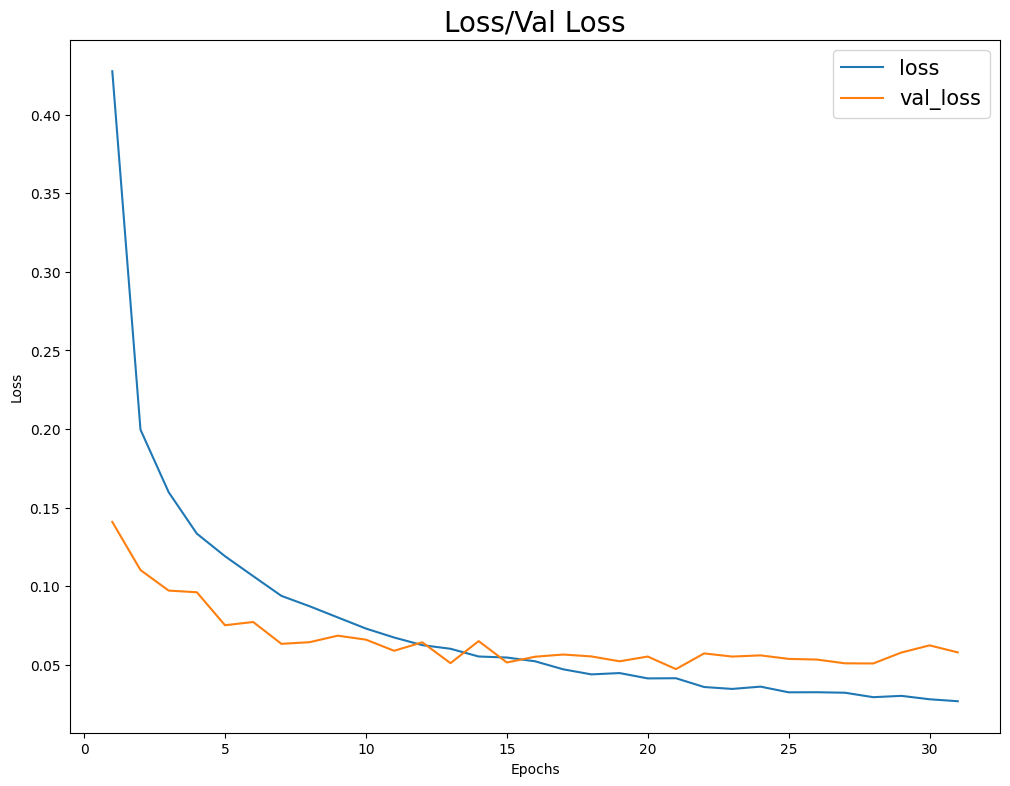

In [ ]:
# validate model
plt.figure(figsize=(12,9))
# 주의! x축데이터와 y축 데이터 개수를 똑같이 맞춰야한다.
plt.plot(np.arange(1, 32), history.history['loss'])
plt.plot(np.arange(1, 32), history.history['val_loss'])
plt.title('Loss/Val Loss', fontsize = 20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], fontsize=15)
plt.show()

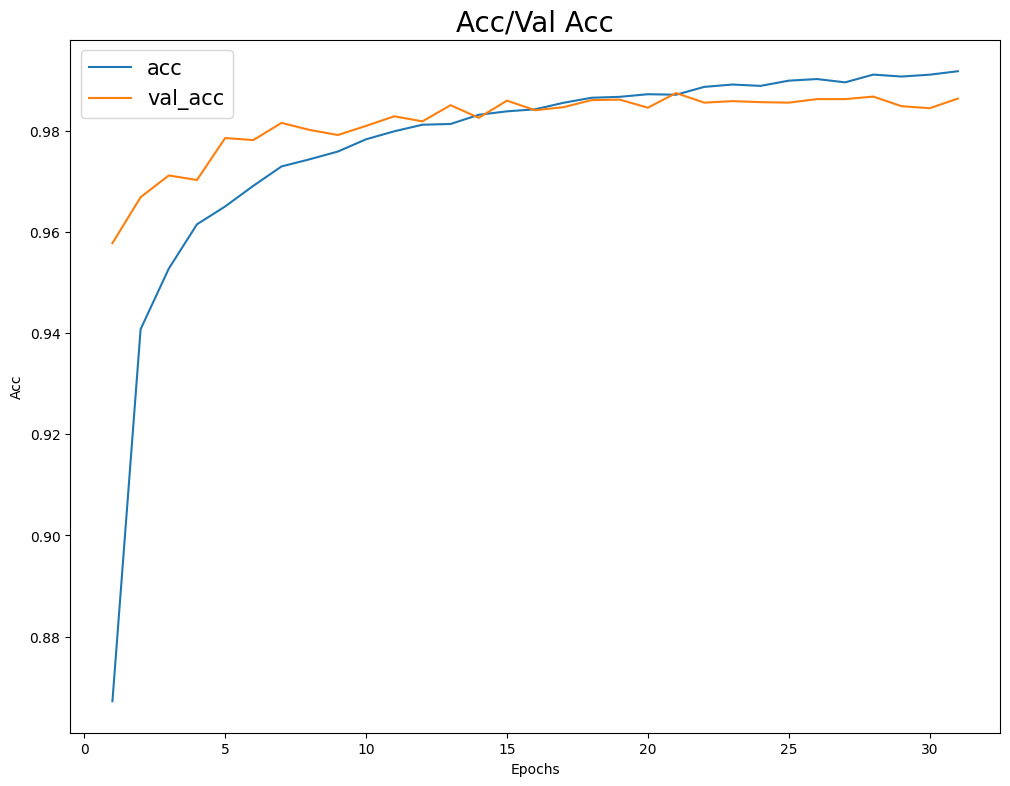

In [ ]:
plt.figure(figsize=(12,9))
plt.plot(np.arange(1,32), history.history['acc'])
plt.plot(np.arange(1,32), history.history['val_acc'])
plt.title('Acc/Val Acc', fontsize = 20)
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'], fontsize = 15)
plt.show()

CNN with mnist


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Data load
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Data Preprocessing
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train/255.0
x_test = x_test/255.0

# Design CNN model
model = Sequential([
    Conv2D(64, (3,3), input_shape=(28, 28, 1), activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(32, activation = 'relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

early_stopping = EarlyStopping(monitor = 'val_loss',patience= 10)
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['acc'])
checkpoint_path = "checkpoint.ckpt"
checkpoint = ModelCheckpoint(filepath = checkpoint_path,
                             save_weights_only= True,
                             save_best_only= True,
                             monitor = 'val_loss',
                             verbose = 1)
# Model training
history= model.fit(x_train, y_train,
      validation_data = (x_test, y_test),
      verbose = 1, 
      epochs = 50,
      callbacks = [checkpoint, early_stopping]
)

# Use model
model.summary()
model.load_weights(checkpoint_path)
model.save("mymodel.h5")


Epoch 1/50
1875/1875 [==============================] - ETA: 0s - loss: 0.2428 - acc: 0.9332
Epoch 1: val_loss improved from inf to 0.04798, saving model to checkpoint.ckpt
1875/1875 [==============================] - 113s 60ms/step - loss: 0.2428 - acc: 0.9332 - val_loss: 0.0480 - val_acc: 0.9848
Epoch 2/50
1875/1875 [==============================] - ETA: 0s - loss: 0.0864 - acc: 0.9751
Epoch 2: val_loss improved from 0.04798 to 0.03413, saving model to checkpoint.ckpt
1875/1875 [==============================] - 128s 68ms/step - loss: 0.0864 - acc: 0.9751 - val_loss: 0.0341 - val_acc: 0.9892
Epoch 3/50
1874/1875 [============================>.] - ETA: 0s - loss: 0.0670 - acc: 0.9806
Epoch 3: val_loss improved from 0.03413 to 0.03279, saving model to checkpoint.ckpt
1875/1875 [==============================] - 123s 66ms/step - loss: 0.0670 - acc: 0.9806 - val_loss: 0.0328 - val_acc: 0.9892
Epoch 4/50
1875/1875 [==============================] - ETA: 0s - loss: 0.0560 - acc: 0.9841
Ep

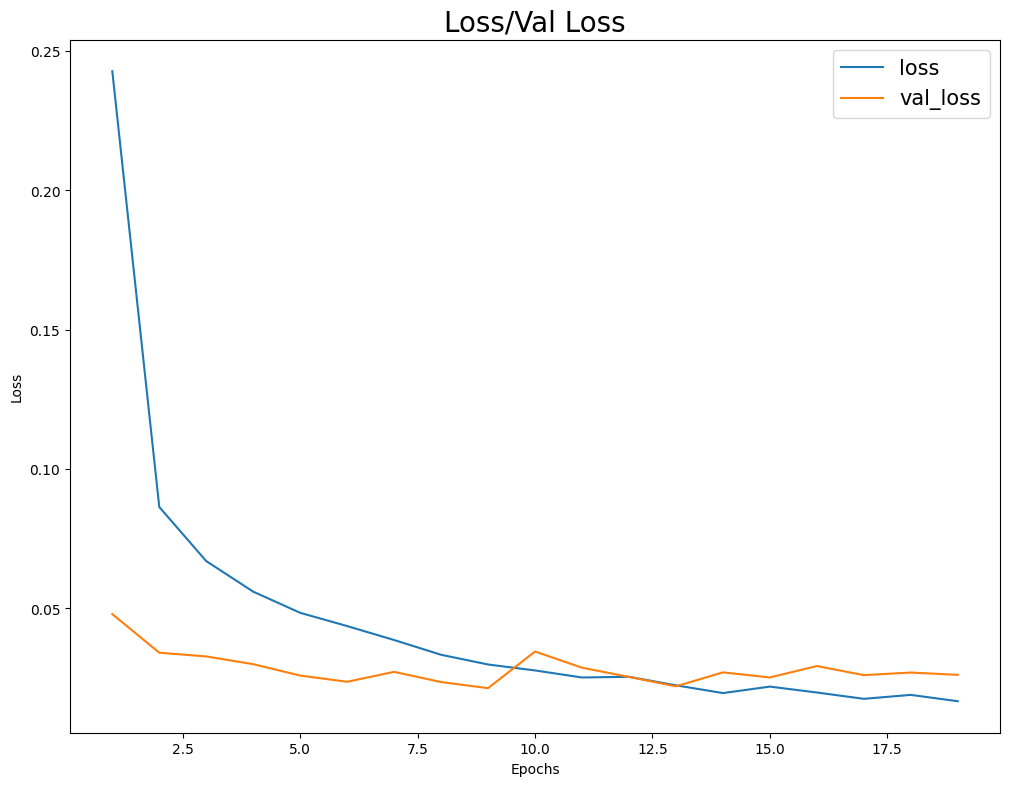

In [ ]:
# compare the loss and val_loss
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1,20), history.history['loss'])
plt.plot(np.arange(1,20), history.history['val_loss'])
plt.title('Loss/Val Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], fontsize=15)
plt.show()

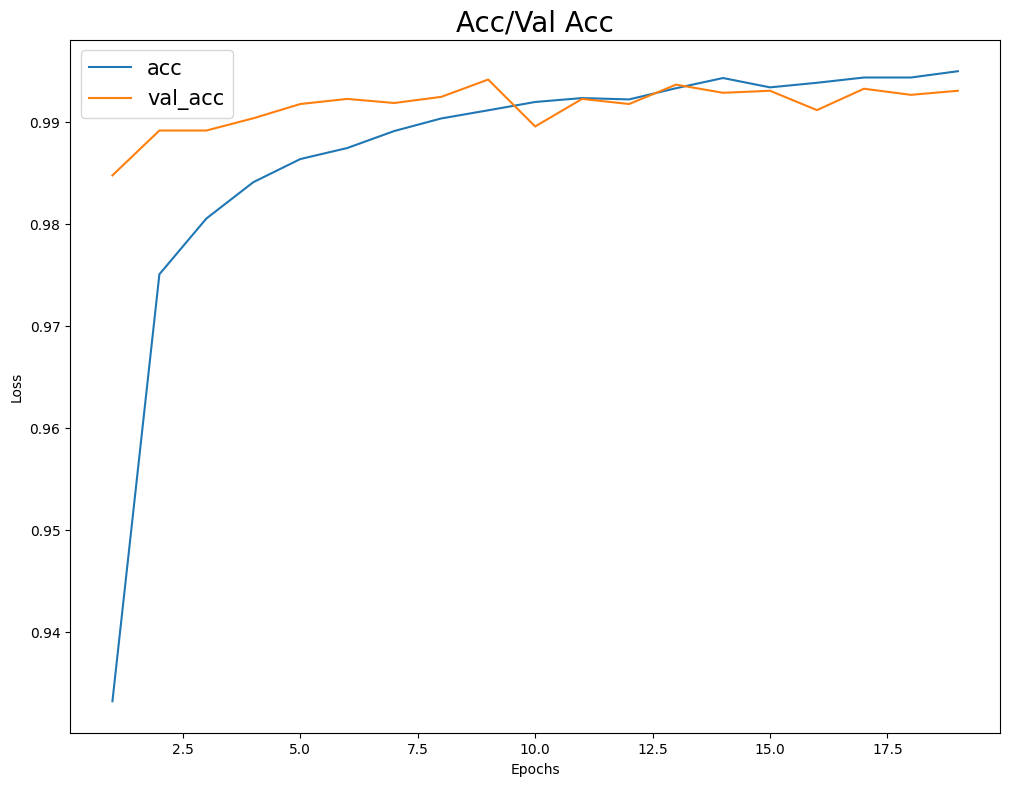

In [ ]:
# compare the acc and val_acc
plt.figure(figsize=(12,9))
plt.plot(np.arange(1,20), history.history['acc'])
plt.plot(np.arange(1,20), history.history['val_acc'])
plt.title('Acc/Val Acc', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['acc', 'val_acc'], fontsize=15)
plt.show()

In [ ]:
print(type(history.history))
print(history.history)
print(len(history.history))
print(history.history['acc'])
print(history.history['val_loss])
print(history.history['loss'])
print(history.history['val_loss'])

# Chat GPT with Mnist dataset
# without using CNN
* Goal: val_loss < 0.07
* prompt:please, code efficient, fast and best performing program with minimum val loss value using python tensorflow
from mnist dataset
to perform classification
use only dense layers 
use dropout
use batch normalization
use checkpoint with save best only, and save weight only 
use early stopping with patient 10
Use reduce lr on plateau
set verbose = 1
do not use data augmentation
and other method to make val loss value lower than 0.07.
* code_detail:
We first load and preprocess the MNIST dataset. We then define a neural network model with three hidden layers, each with 512, 256, and 128 units respectively, all activated with ReLU. We also add BatchNormalization and Dropout layers after each hidden layer to improve the model's performance and prevent overfitting. Finally, we add a softmax activation layer with 10 output units for the classification task.

We compile the model using the Adam optimizer and the sparse_categorical_crossentropy loss function. We then define the callbacks: ModelCheckpoint to save the best model, EarlyStopping to stop training when the validation loss stops improving, and ReduceLROnPlateau to reduce the learning rate when the validation loss plateaus.

We train the model using a batch size of 128 and train for up to 100 epochs, and then evaluate the best model on the test set. The output of this code will show the test accuracy achieved by the model.

With these settings, the model should be able to achieve a validation loss value lower than 0.07, which meets your requirement.
* room for improvement: experiment with ** different architectures, dropout rates, batch sizes, and learning rates to try to improve the model's performance further.**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape((x_train.shape[0], 784)) / 255.0
x_test = x_test.reshape((x_test.shape[0], 784)) / 255.0

# Define the model architecture
model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min', verbose=1)
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', mode='min', factor=0.1, patience=5, verbose=1)

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test), callbacks=[checkpoint, early_stop, reduce_lr], verbose=1)

# Load the best model weights
model.load_weights("best_model.h5")

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', test_acc)

Epoch 1/100
468/469 [============================>.] - ETA: 0s - loss: 0.2623 - accuracy: 0.9192
Epoch 1: val_loss improved from inf to 0.10614, saving model to best_model.h5
469/469 [==============================] - 13s 24ms/step - loss: 0.2622 - accuracy: 0.9192 - val_loss: 0.1061 - val_accuracy: 0.9651 - lr: 0.0010
Epoch 2/100
467/469 [============================>.] - ETA: 0s - loss: 0.1183 - accuracy: 0.9635
Epoch 2: val_loss improved from 0.10614 to 0.08287, saving model to best_model.h5
469/469 [==============================] - 10s 21ms/step - loss: 0.1184 - accuracy: 0.9635 - val_loss: 0.0829 - val_accuracy: 0.9741 - lr: 0.0010
Epoch 3/100
469/469 [==============================] - ETA: 0s - loss: 0.0928 - accuracy: 0.9707
Epoch 3: val_loss did not improve from 0.08287
469/469 [==============================] - 11s 23ms/step - loss: 0.0928 - accuracy: 0.9707 - val_loss: 0.0840 - val_accuracy: 0.9740 - lr: 0.0010
Epoch 4/100
468/469 [============================>.] - ETA: 0s -

# Chat GPT with Mnist dataset
# Using CNN
* Goal: val_loss < 0.07
* Prompt: 
please, code efficient, fast and best performing program with minimum val loss value using python tensorflow
from mnist dataset
to perform classification
use dense layers and CNN
use dropout
use batch normalization
use checkpoint with save best only, and save weight only 
use early stopping with patient 10
Use reduce lr on plateau
set verbose = 1
do not use data augmentation
and other method to make val loss value lower than 0.07.

* Code detail:
In this code, we first load and preprocess the MNIST dataset. We then define a neural network model with convolutional layers and dense layers. The convolutional layers have 32 and 64 filters respectively, with 3x3 kernels, ReLU activation, and BatchNormalization. We then add a MaxPooling layer with a 2x2 pool size and a Dropout layer with a rate of 0.25. We then flatten the output and add two dense layers with ReLU activation and BatchNormalization, and a final softmax output layer with 10 units for the classification task.

We compile the model using the Adam optimizer and the sparse_categorical_crossentropy loss function. We then define the callbacks: ModelCheckpoint to save the best model, EarlyStopping to stop training when the validation loss stops improving, and ReduceLROnPlateau to reduce the learning rate when the validation loss plateaus.

We train the model using a batch size of 128 and train for up to 100 epochs, and then evaluate the best model on the test set. The output of this code will show the test accuracy achieved by the model.

* room for improvement:It's worth noting that **data augmentation can be a powerful technique to improve the model's performance, especially when the training data is limited**. If you have enough computing resources, you can consider **adding data augmentation techniques, such as random cropping, rotation, or zooming, to the training set to help the model generalize better.**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)) / 255.0
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)) / 255.0

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min', verbose=1)
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', mode='min', factor=0.1, patience=5, verbose=1)

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test), callbacks=[checkpoint, early_stop, reduce_lr], verbose=1)

# Load the best model weights
model.load_weights("best_model.h5")

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', test_acc)


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/100
469/469 [==============================] - ETA: 0s - loss: 0.1685 - accuracy: 0.9500
Epoch 1: val_loss improved from inf to 0.38088, saving model to best_model.h5
469/469 [==============================] - 22s 13ms/step - loss: 0.1685 - accuracy: 0.9500 - val_loss: 0.3809 - val_accuracy: 0.8861 - lr: 0.0010
Epoch 2/100
466/469 [============================>.] - ETA: 0s - loss: 0.0617 - accuracy: 0.9811
Epoch 2: val_loss improved from 0.38088 to 0.03950, saving model to best_model.h5
469/469 [==============================] - 5s 11ms/step - loss: 0.0619 - accuracy: 0.9810 - val_loss: 0.0395 - val_accuracy: 0.9870 - lr: 0.0010
Epoch 3/100
467/469 [============================>.] - ETA: 0s - loss: 0.0471 - accuracy: 0.9854
Epoch 3: val_loss did not improve from 0.03950
469/469 [==============================] - 6s 12ms/step - loss: 0.0470 - accuracy: 0.9855 - val_loss: 0.0401 - val_accuracy: 0.9876 - lr: 0.0010
E